In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import matplotlib as mpl

mpl.rcParams['lines.linewidth'] = 2

In [ ]:
FIGSIZE = (4.0, 2.5)

In [3]:
def result_parser(filename):
    df = pd.read_csv(exp_path+filename,index_col=0)
    name_info = filename[:-23].split('_')
    folder_inf = exp_path.split('/')
    model_name = name_info[0]
    if name_info[1] in ['ELIC','HiFiC','jpeg']:
        defense = name_info[1]
    else:
        defense = 'None'
    attack = None
    for a in ['FGSM','iFGSM','PGD','DeepFool','CW']:
        if a in name_info:
            attack = a
    through = False
    if name_info[-1] == 'through':
        through = True
    return [model_name,attack,defense,through]+[v for v in df.values[0]]
    

def line_print(i):
    if i%14 == 0:
        line = '\\hline'
    elif i%7 ==0:
        line = '\\cline{2-8}'
    elif i%7 in [1,3,5]:
        line = '\\cline{3-8}'
    else:
        line = '\\cline{4-8}'
    return line
    
cell_colors= 'lightgray,lightblue,darkblue,lightred,darkred,lightgreen,darkgreen'.split(',')
def cell_color(i):
    return cell_colors[(i-1)%7]
    
colors={'None':'gray','jpeg':'blue', 'HiFiC':'red','ELIC':'green'}
def plot_row(df,title,ax,legend = False):
    """
    This function takes a list of Pandas DataFrames with one row each 
    and plots the values in this row.
    
    Parameters:
        dataframes (list): List of Pandas DataFrames, each containing only one row.
    
    Returns:
        None
    """
    fig, ay = plt.subplots()
    
    for i in range(len(df)):
        if df.iloc[i,3]:
            ax.plot([0,*df.columns[5:]], df.iloc[i,4:], marker='o', label=df.iloc[i,2]+'_T',color=colors[df.iloc[i,2]],linestyle='dashed')
        else:
            ax.plot([0,*df.columns[5:]], df.iloc[i,4:], marker='o', label=df.iloc[i,2],color=colors[df.iloc[i,2]])
    ax.set_xlabel('Epsilon')
    ax.set_ylabel('Accuracy')
    plt.yticks(np.arange(0.0, 1.1, 0.1))
    order = [4,6,5,3,2,1,0]
    handles, labels = ax.get_legend_handles_labels()
    if legend:
        ax.legend([handles[idx] for idx in order],[labels[idx] for idx in order])
    plt.title(title)
    ax.grid(True)
    f_name = title.replace(' ','_')
    #plt.savefig(f'{f_name}.pdf',format='pdf')
    #plt.show()
    return ax


In [4]:
exp_path = 'results/seq/imagenette/jpeg/'
def result_parser(filename):
    df = pd.read_csv(exp_path+filename,index_col=0)
    name_info = filename[:-23].split('_')
    folder_info = exp_path.split('/')
    model_name = 'ResNet50'
    dataset = folder_info[2]
    
    defense = folder_info[3]
    n = float(name_info[0])
    q = 25.0
    return [model_name,dataset,q,n]+[v for v in df.values[0]]
    

results = pd.DataFrame(columns=['model_name','dataset','q','n','baseline','4/255','8/255','12/255'])
for i,f in enumerate(sorted(os.listdir(exp_path))):
    if not f.startswith('.'):     
        results.loc[i] = result_parser(f)
results.sort_values('n',inplace=True)
# results

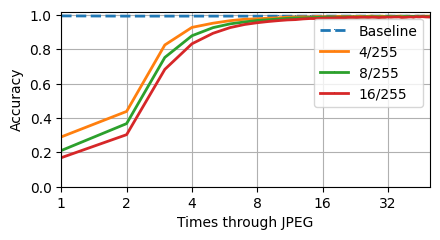

In [5]:
def plot_df(df,title,marker=','):
    baseline = df['baseline'].to_numpy()
    eps4 = df['4/255'].to_numpy()
    eps8 = df['8/255'].to_numpy()
    eps12 = df['12/255'].to_numpy()
    fig, ax = plt.subplots(figsize = FIGSIZE)
    names = range(1,len(df)+1)
    ax.plot(names,baseline, marker=',',linestyle ='dashed', label='Baseline')
    ax.plot(names,eps4, marker=marker, label='4/255')
    ax.plot(names,eps8, marker=marker, label='8/255')
    ax.plot(names,eps12, marker=marker, label='16/255')
    ax.set_xlabel('Times through JPEG')
    ax.set_ylabel('Accuracy')
    ax.legend()
    # plt.yticks(np.arange(0.0, 1.1, 0.1))
    ax.set_ylim(0.0, 1.02)
    ax.set_xlim(1, 50)
    # use base 2 log scale for x-axis
    ax.set_xscale('log', base=2)
    ax.set_xticks([1,2,4,8,16,32])
    ax.get_xaxis().set_major_formatter(plt.ScalarFormatter())
    ax.grid(True)
    fig.tight_layout()
    plt.savefig(f'{title}.pdf',format='pdf',bbox_inches='tight')
    plt.show()
plot_df(results,'jpeg_seq_large')

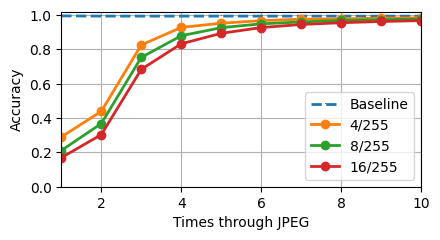

In [6]:
def plot_df(df,title):
    baseline = df['baseline'].to_numpy()
    eps4 = df['4/255'].to_numpy()
    eps8 = df['8/255'].to_numpy()
    eps12 = df['12/255'].to_numpy()
    fig, ax = plt.subplots(figsize = FIGSIZE)
    names = range(1,len(df)+1)
    ax.plot(names,baseline, marker=',',linestyle ='dashed', label='Baseline')
    ax.plot(names,eps4, marker='o', label='4/255')
    ax.plot(names,eps8, marker='o', label='8/255')
    ax.plot(names,eps12, marker='o', label='16/255')
    ax.set_xlabel('Times through JPEG')
    ax.set_ylabel('Accuracy')
    ax.legend()
    # plt.yticks(np.arange(0.0, 1.1, 0.1))
    ax.set_ylim(0.0, 1.02)
    ax.set_xlim(1, 10)
    ax.grid(True)
    fig.tight_layout()
    plt.savefig(f'{title}.pdf',format='pdf',bbox_inches='tight')
    plt.show()
plot_df(results[:10],'jpeg_seq_small')

In [7]:
exp_path = 'results/seq/imagenette/hific/'
def result_parser(filename):
    df = pd.read_csv(exp_path+filename,index_col=0)
    name_info = filename[:-23].split('_')
    folder_info = exp_path.split('/')
    model_name = 'ResNet50'
    dataset = folder_info[2]
    
    defense = folder_info[3]
    n = float(name_info[0])
    q = 25.0
    return [model_name,dataset,q,n]+[v for v in df.values[0]]
    

results_h = pd.DataFrame(columns=['model_name','dataset','q','n','baseline','4/255','8/255','12/255'])
for i,f in enumerate(sorted(os.listdir(exp_path))):
    if not f.startswith('.'):     
        results_h.loc[i] = result_parser(f)
results_h.sort_values('n',inplace=True)
results_h

    

,model_name,dataset,q,n,baseline,4/255,8/255,12/255
0,ResNet50,imagenette,25.0,1.0,0.994650,0.311592,0.161529,0.101401
1,ResNet50,imagenette,25.0,2.0,0.992611,0.358981,0.182166,0.116178
2,ResNet50,imagenette,25.0,3.0,0.990318,0.399490,0.211465,0.134522
3,ResNet50,imagenette,25.0,4.0,0.988535,0.444331,0.245350,0.153121
4,ResNet50,imagenette,25.0,5.0,0.988790,0.498344,0.284331,0.177070
5,ResNet50,imagenette,25.0,6.0,0.988535,0.548790,0.328662,0.212739
6,ResNet50,imagenette,25.0,7.0,0.987006,0.601783,0.384713,0.252994


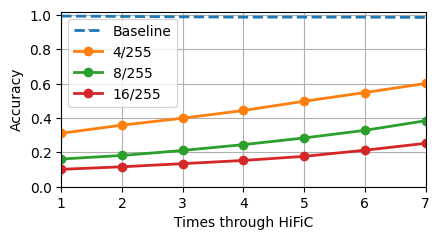

In [8]:
def plot_df(df,title,defense):
    baseline = df['baseline'].to_numpy()
    eps4 = df['4/255'].to_numpy()
    eps8 = df['8/255'].to_numpy()
    eps12 = df['12/255'].to_numpy()
    fig, ax = plt.subplots(figsize = FIGSIZE)
    names = range(1,len(df)+1)
    ax.plot(names,baseline, marker=',',linestyle ='dashed', label='Baseline')
    ax.plot(names,eps4, marker='o', label='4/255')
    ax.plot(names,eps8, marker='o', label='8/255')
    ax.plot(names,eps12, marker='o', label='16/255')
    ax.set_xlabel(f'Times through {defense}')
    ax.set_ylabel('Accuracy')
    ax.legend()
    # plt.yticks(np.arange(0.0, 1.1, 0.1))
    ax.set_ylim(0.0, 1.02)
    ax.set_xlim(1, 7)
    ax.grid(True)
    fig.tight_layout()
    plt.savefig(f'{title}.pdf',format='pdf',bbox_inches='tight')
    
    plt.show()

plot_df(results_h,'hific_seq', 'HiFiC')

In [9]:
exp_path = 'results/seq/imagenette/elic/'
def result_parser(filename):
    df = pd.read_csv(exp_path+filename,index_col=0)
    name_info = filename[:-23].split('_')
    folder_info = exp_path.split('/')
    model_name = 'ResNet50'
    dataset = folder_info[2]
    
    defense = folder_info[3]
    n = float(name_info[0])
    q = 25.0
    return [model_name,dataset,q,n]+[v for v in df.values[0]]
    

results_e = pd.DataFrame(columns=['model_name','dataset','q','n','baseline','4/255','8/255','12/255'])
for i,f in enumerate(sorted(os.listdir(exp_path))):
    if not f.startswith('.'):     
        results_e.loc[i] = result_parser(f)
results_e.sort_values('n',inplace=True)
results_e

    

,model_name,dataset,q,n,baseline,4/255,8/255,12/255
0,ResNet50,imagenette,25.0,1.0,0.997962,0.254777,0.109809,0.067771
1,ResNet50,imagenette,25.0,2.0,0.997707,0.320255,0.133503,0.086369
2,ResNet50,imagenette,25.0,3.0,0.997452,0.375287,0.155414,0.093503
3,ResNet50,imagenette,25.0,4.0,0.997452,0.433376,0.188535,0.115159
4,ResNet50,imagenette,25.0,5.0,0.997962,0.500892,0.230573,0.145223
5,ResNet50,imagenette,25.0,6.0,0.997452,0.594650,0.300892,0.190064
6,ResNet50,imagenette,25.0,7.0,0.997707,0.706752,0.410446,0.270573


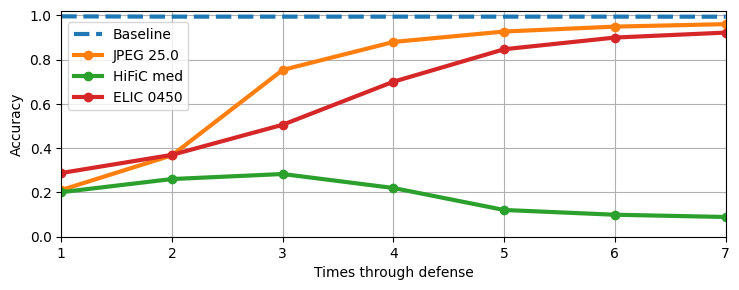

In [38]:
def plot_df_0(df1,df2,df3,title):
    baseline = df1['baseline'].to_numpy()
    eps81 = df1['8/255'].to_numpy()
    eps82 = df2['8/255'].to_numpy()
    eps83 = df3['8/255'].to_numpy()
    fig, ax = plt.subplots(figsize = (7.5, 3))
    # fig, ax = plt.subplots(figsize = FIGSIZE)
    names = range(1,len(df1)+1)
    ax.plot(names,baseline, marker=',',linestyle ='dashed', label='Baseline', linewidth=3)
    ax.plot(names,eps81, marker='o', label='JPEG 25.0', linewidth=3)
    ax.plot(names,eps82, marker='o', label='HiFiC med', linewidth=3)
    ax.plot(names,eps83, marker='o', label='ELIC 0450', linewidth=3)
    ax.set_xlabel('Times through defense')
    ax.set_ylabel('Accuracy')
    ax.legend(loc='upper left',
              bbox_to_anchor=(0, 0.98))
    # plt.yticks(np.arange(0.0, 1.1, 0.1))
    ax.set_ylim(0.0, 1.02)
    ax.set_xlim(1, 7)
    ax.grid(True)
    fig.tight_layout()
    plt.savefig(f'{title}.svg', format="svg",bbox_inches='tight')
    plt.show()


plot_df_0(results[:7],results_h,results_e,'imagnette_seq')

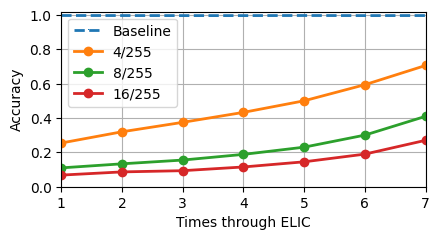

In [11]:
plot_df(results_e,'elic_seq', 'ELIC')

In [12]:
def make_table(df):
    df = df.round(3)
    for index,row in df.iterrows():
        print(row['n'],*['& ' + str(row[i]) for i in ['baseline','4/255','8/255','12/255']],'\\\\ \\hline')
make_table(results_e)

1.0 & 0.998 & 0.255 & 0.11 & 0.068 \\ \hline
2.0 & 0.998 & 0.32 & 0.134 & 0.086 \\ \hline
3.0 & 0.997 & 0.375 & 0.155 & 0.094 \\ \hline
4.0 & 0.997 & 0.433 & 0.189 & 0.115 \\ \hline
5.0 & 0.998 & 0.501 & 0.231 & 0.145 \\ \hline
6.0 & 0.997 & 0.595 & 0.301 & 0.19 \\ \hline
7.0 & 0.998 & 0.707 & 0.41 & 0.271 \\ \hline


In [13]:
make_table(results_h)

1.0 & 0.995 & 0.312 & 0.162 & 0.101 \\ \hline
2.0 & 0.993 & 0.359 & 0.182 & 0.116 \\ \hline
3.0 & 0.99 & 0.399 & 0.211 & 0.135 \\ \hline
4.0 & 0.989 & 0.444 & 0.245 & 0.153 \\ \hline
5.0 & 0.989 & 0.498 & 0.284 & 0.177 \\ \hline
6.0 & 0.989 & 0.549 & 0.329 & 0.213 \\ \hline
7.0 & 0.987 & 0.602 & 0.385 & 0.253 \\ \hline


In [14]:
make_table(results)

1.0 & 0.996 & 0.29 & 0.211 & 0.169 \\ \hline
2.0 & 0.994 & 0.439 & 0.368 & 0.303 \\ \hline
3.0 & 0.994 & 0.826 & 0.754 & 0.684 \\ \hline
4.0 & 0.994 & 0.929 & 0.88 & 0.833 \\ \hline
5.0 & 0.994 & 0.953 & 0.927 & 0.894 \\ \hline
6.0 & 0.994 & 0.968 & 0.949 & 0.928 \\ \hline
7.0 & 0.994 & 0.976 & 0.961 & 0.946 \\ \hline
8.0 & 0.994 & 0.979 & 0.969 & 0.956 \\ \hline
9.0 & 0.994 & 0.982 & 0.973 & 0.963 \\ \hline
10.0 & 0.994 & 0.984 & 0.978 & 0.968 \\ \hline
11.0 & 0.994 & 0.989 & 0.981 & 0.972 \\ \hline
12.0 & 0.994 & 0.989 & 0.984 & 0.974 \\ \hline
13.0 & 0.994 & 0.991 & 0.984 & 0.978 \\ \hline
14.0 & 0.994 & 0.988 & 0.986 & 0.98 \\ \hline
15.0 & 0.994 & 0.992 & 0.987 & 0.98 \\ \hline
16.0 & 0.994 & 0.991 & 0.988 & 0.983 \\ \hline
17.0 & 0.994 & 0.99 & 0.99 & 0.984 \\ \hline
18.0 & 0.994 & 0.99 & 0.988 & 0.984 \\ \hline
19.0 & 0.994 & 0.993 & 0.988 & 0.985 \\ \hline
20.0 & 0.994 & 0.991 & 0.989 & 0.985 \\ \hline
21.0 & 0.994 & 0.992 & 0.99 & 0.987 \\ \hline
22.0 & 0.994 & 0.991 & 0.989 &

ImageNet Results

In [15]:
exp_path = 'results/seq/imagenet/jpeg/'
def result_parser(filename):
    df = pd.read_csv(exp_path+filename,index_col=0)
    name_info = filename[:-23].split('_')
    folder_info = exp_path.split('/')
    model_name = name_info[0]
    dataset = folder_info[2]
    
    defense = folder_info[3]
    n = float(name_info[3])
    q = float(name_info[2])
    return [model_name,dataset,q,n]+[v for v in df.values[0]]
    

results_jpeg = pd.DataFrame(columns=['model_name','dataset','q','n','baseline','4/255','8/255','12/255'])
for i,f in enumerate(sorted(os.listdir(exp_path))):
    if not f.startswith('.'):     
        results_jpeg.loc[i] = result_parser(f)
results_jpeg.sort_values(['q','n'],inplace=True)
results_jpeg


,model_name,dataset,q,n,baseline,4/255,8/255,12/255
2,ResNet,imagenet,10.0,1.0,0.621,0.075,0.051,0.034
72,Vit,imagenet,10.0,1.0,0.667,0.020,0.006,0.006
3,ResNet,imagenet,10.0,2.0,0.584,0.096,0.075,0.066
73,Vit,imagenet,10.0,2.0,0.634,0.035,0.021,0.016
4,ResNet,imagenet,10.0,3.0,0.601,0.205,0.159,0.146
...,...,...,...,...,...,...,...,...
139,Vit,imagenet,95.0,8.0,0.801,0.412,0.257,0.186
70,ResNet,imagenet,95.0,9.0,0.789,0.482,0.397,0.334
140,Vit,imagenet,95.0,9.0,0.787,0.418,0.267,0.203
61,ResNet,imagenet,95.0,10.0,0.816,0.553,0.439,0.377


In [16]:
results_jpeg.loc[results_jpeg['model_name'] == 'ResNet']

,model_name,dataset,q,n,baseline,4/255,8/255,12/255
2,ResNet,imagenet,10.0,1.0,0.621,0.075,0.051,0.034
3,ResNet,imagenet,10.0,2.0,0.584,0.096,0.075,0.066
4,ResNet,imagenet,10.0,3.0,0.601,0.205,0.159,0.146
5,ResNet,imagenet,10.0,4.0,0.582,0.330,0.269,0.229
6,ResNet,imagenet,10.0,5.0,0.596,0.392,0.352,0.324
...,...,...,...,...,...,...,...,...
67,ResNet,imagenet,95.0,6.0,0.781,0.432,0.337,0.291
68,ResNet,imagenet,95.0,7.0,0.793,0.465,0.363,0.310
69,ResNet,imagenet,95.0,8.0,0.765,0.473,0.375,0.306
70,ResNet,imagenet,95.0,9.0,0.789,0.482,0.397,0.334


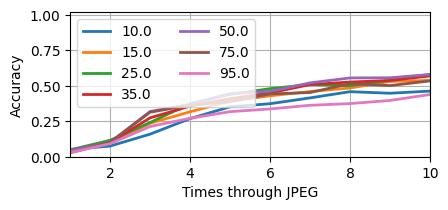

In [17]:
def plot_df_1(df,title):
    fig, ax = plt.subplots(figsize = (4.5, 2.2))
    qs = df['q'].unique()
    for q in qs:
        df_q = df.loc[df['q'] == q]
        eps8 = df_q['8/255'].to_numpy()
        baseline = df_q['baseline'].to_numpy()
        names = range(1,len(df_q)+1)
        #ax.plot(names,baseline, marker=',',linestyle ='dashed', label='Baseline '+str(q))
        ax.plot(names,eps8, marker=',', label=q, linewidth=2)
   
    ax.set_xlabel('Times through JPEG')
    ax.set_ylabel('Accuracy')
    ax.legend(ncols=2)
    # plt.yticks(np.arange(0.0, 1.1, 0.1))
    ax.set_ylim(0.0, 1.02)
    ax.set_xlim(1, 10)
    ax.grid(True)
    fig.tight_layout()
    plt.savefig(f'{title}.pdf',format='pdf',bbox_inches='tight')
    plt.show()
plot_df_1(results_jpeg.loc[results_jpeg['model_name'] == 'ResNet'], 'jpeg_seq_imagenet_rn_qs')

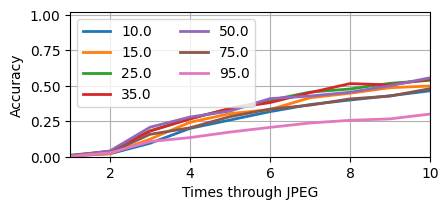

In [18]:
plot_df_1(results_jpeg.loc[results_jpeg['model_name'] == 'Vit'], 'jpeg_seq_imagenet_vit_qs')

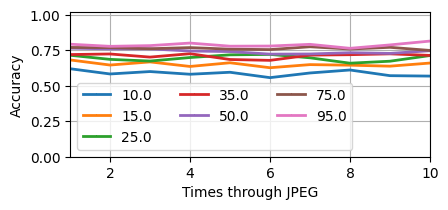

In [19]:
def plot_df_2(df,title):
    fig, ax = plt.subplots(figsize = (4.5,2.2))
    qs = df['q'].unique()
    for q in qs:
        df_q = df.loc[df['q'] == q]
        eps8 = df_q['8/255'].to_numpy()
        baseline = df_q['baseline'].to_numpy()
        names = range(1,len(df_q)+1)
        ax.plot(names,baseline, marker=',', label=str(q), linewidth=2)
        #ax.plot(names,eps8, marker='o', label=q)
   
    ax.set_xlabel('Times through JPEG')
    ax.set_ylabel('Accuracy')
    ax.legend(ncols=3)
    # plt.yticks(np.arange(0.0, 1.1, 0.1))
    ax.set_ylim(0.0, 1.02)
    ax.set_xlim(1, 10)
    ax.grid(True)
    fig.tight_layout()
    plt.savefig(f'{title}.pdf',format='pdf',bbox_inches='tight')
    plt.show()
plot_df_2(results_jpeg.loc[results_jpeg['model_name'] == 'ResNet'],'jpeg_seq_imagenet_rn_qs_base')

In [20]:
exp_path = 'results/seq/imagenet/jpeg_deep/'
def result_parser(filename):
    df = pd.read_csv(exp_path+filename,index_col=0)
    name_info = filename[:-23].split('_')
    folder_info = exp_path.split('/')
    model_name = name_info[0]
    dataset = folder_info[2]
    
    defense = folder_info[3]
    n = float(name_info[3])
    q = float(name_info[2])
    return [model_name,dataset,q,n]+[v for v in df.values[0]]
    

results_jpeg = pd.DataFrame(columns=['model_name','dataset','q','n','baseline','4/255','8/255','12/255'])
for i,f in enumerate(sorted(os.listdir(exp_path))):
    if not f.startswith('.'):     
        results_jpeg.loc[i] = result_parser(f)
results_jpeg.sort_values(['q','n'],inplace=True)
results_jpeg


,model_name,dataset,q,n,baseline,4/255,8/255,12/255
10,ResNet,imagenet,10.0,1.0,0.621,0.075,0.051,0.034
21,ResNet,imagenet,10.0,2.0,0.584,0.096,0.075,0.066
32,ResNet,imagenet,10.0,3.0,0.601,0.205,0.159,0.146
43,ResNet,imagenet,10.0,4.0,0.582,0.330,0.269,0.229
45,ResNet,imagenet,10.0,5.0,0.596,0.392,0.352,0.324
...,...,...,...,...,...,...,...,...
89,ResNet,imagenet,95.0,46.0,0.764,0.721,0.687,0.662
90,ResNet,imagenet,95.0,47.0,0.763,0.718,0.679,0.654
91,ResNet,imagenet,95.0,48.0,0.764,0.719,0.681,0.666
92,ResNet,imagenet,95.0,49.0,0.763,0.724,0.671,0.658


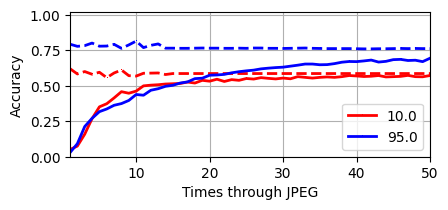

In [21]:
colors={10.0:'red',95.0:'blue'}
def plot_df_3(df,title):
    fig, ax = plt.subplots(figsize = (4.5,2.2))
    qs = df['q'].unique()
    for q in qs:
        df_q = df.loc[df['q'] == q]
        eps8 = df_q['8/255'].to_numpy()
        baseline = df_q['baseline'].to_numpy()
        names = range(1,len(df_q)+1)
        ax.plot(names,baseline, marker=',',linestyle ='dashed', label='_nolegend_',color=colors[q], linewidth=2)
        ax.plot(names,eps8, marker=',', label=q,color=colors[q], linewidth=2)
   
    ax.set_xlabel('Times through JPEG')
    ax.set_ylabel('Accuracy')
    ax.legend()
    # plt.yticks(np.arange(0.0, 1.1, 0.1))
    ax.set_ylim(0.0, 1.02)
    ax.set_xlim(1, 50)
    ax.grid(True)
    fig.tight_layout()
    plt.savefig(f'{title}.pdf',format='pdf',bbox_inches='tight')
    plt.show()
plot_df_3(results_jpeg.loc[results_jpeg['model_name'] == 'ResNet'],'jpeg_seq_imagenet_deep')

In [22]:
exp_path = 'results/seq/imagenette/hific_low/'
def result_parser(filename):
    df = pd.read_csv(exp_path+filename,index_col=0)
    name_info = filename[:-23].split('_')
    folder_info = exp_path.split('/')
    model_name = 'ResNet50'
    dataset = folder_info[2]
    
    defense = folder_info[3]
    n = float(name_info[4])
    q = 25.0
    return [model_name,dataset,q,n]+[v for v in df.values[0]]
    

results_h = pd.DataFrame(columns=['model_name','dataset','q','n','baseline','4/255','8/255','12/255'])
for i,f in enumerate(sorted(os.listdir(exp_path))):
    if not f.startswith('.'):     
        results_h.loc[i] = result_parser(f)
results_h.sort_values('n',inplace=True)
results_h

    

,model_name,dataset,q,n,baseline,4/255,8/255,12/255
0,ResNet50,imagenette,25.0,1.0,0.975287,0.381401,0.201274,0.127643
1,ResNet50,imagenette,25.0,2.0,0.902420,0.480255,0.260637,0.148280
2,ResNet50,imagenette,25.0,3.0,0.692994,0.436688,0.283312,0.195924
3,ResNet50,imagenette,25.0,4.0,0.350318,0.273885,0.220127,0.185987
4,ResNet50,imagenette,25.0,5.0,0.136051,0.129172,0.120764,0.117452
5,ResNet50,imagenette,25.0,6.0,0.103439,0.098599,0.099363,0.096561
6,ResNet50,imagenette,25.0,7.0,0.092739,0.083567,0.089172,0.087898


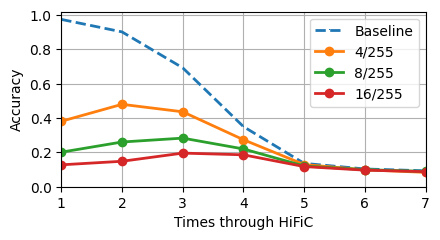

In [23]:
plot_df(results_h,'hific_seq_low', 'HiFiC')

In [24]:
exp_path = 'results/seq/imagenette/elic_low//'
results_e = pd.DataFrame(columns=['model_name','dataset','q','n','baseline','4/255','8/255','12/255'])
for i,f in enumerate(sorted(os.listdir(exp_path))):
    if not f.startswith('.'):     
        results_e.loc[i] = result_parser(f)
results_e.sort_values('n',inplace=True)
results_e

,model_name,dataset,q,n,baseline,4/255,8/255,12/255
0,ResNet50,imagenette,25.0,1.0,0.984204,0.546242,0.287898,0.184459
1,ResNet50,imagenette,25.0,2.0,0.969682,0.644331,0.369936,0.244586
2,ResNet50,imagenette,25.0,3.0,0.958981,0.755414,0.505987,0.356943
3,ResNet50,imagenette,25.0,4.0,0.956178,0.857580,0.700382,0.577070
4,ResNet50,imagenette,25.0,5.0,0.945478,0.906242,0.847134,0.789299
5,ResNet50,imagenette,25.0,6.0,0.939108,0.924586,0.899873,0.881529
6,ResNet50,imagenette,25.0,7.0,0.935541,0.931210,0.922293,0.909554


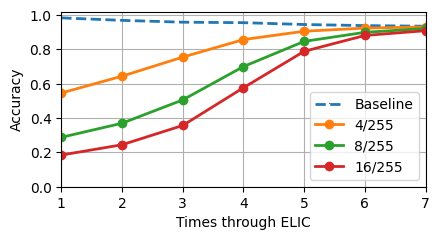

In [25]:
    
plot_df(results_e,'elic_seq_low','ELIC')

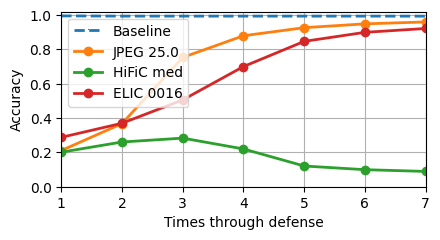

In [26]:
def plot_df_0(df1,df2,df3,title):
    baseline = df1['baseline'].to_numpy()
    eps81 = df1['8/255'].to_numpy()
    eps82 = df2['8/255'].to_numpy()
    eps83 = df3['8/255'].to_numpy()
    fig, ax = plt.subplots(figsize = FIGSIZE)
    names = range(1,len(df1)+1)
    ax.plot(names,baseline, marker=',',linestyle ='dashed', label='Baseline')
    ax.plot(names,eps81, marker='o', label='JPEG 25.0')
    ax.plot(names,eps82, marker='o', label='HiFiC med')
    ax.plot(names,eps83, marker='o', label='ELIC 0016')
    ax.set_xlabel('Times through defense')
    ax.set_ylabel('Accuracy')
    ax.legend(loc='upper left')
    # plt.yticks(np.arange(0.0, 1.1, 0.1))
    ax.set_ylim(0.0, 1.02)
    ax.set_xlim(1, 7)
    ax.grid(True)
    fig.tight_layout()
    plt.savefig(f'{title}.pdf',format='pdf',bbox_inches='tight')
    plt.show()


plot_df_0(results[:7],results_h,results_e,'imagnette_seq')